In [1]:
import numpy as np
# NEXT LINE ONLY FOR COLAB!
# %tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
# COMMENT OUT THIS LINE FOR COLAB!
%matplotlib notebook

In [2]:
print(tf.__version__)

2.3.0


**Disclaimer:** This Notebook heavily depends on the work of Luke Effenberger who held the course last year. You can find his original material under:
https://lukeeffenberger.github.io/IANNWTF-2019/

### Create a simple regression dataset

(-0.05, 0.6)

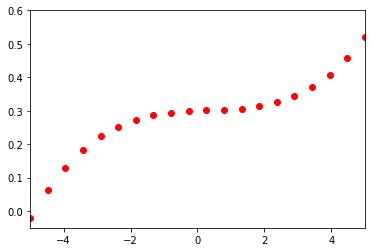

In [4]:
training_data_xs = np.linspace(-5,5, 20, dtype=np.float32)
def f(x):
    return 0.002*(x**3-x**2+2*x)+0.3
training_data_ys = np.array([f(x) for x in training_data_xs], dtype=np.float32)



plt.scatter(training_data_xs, training_data_ys, c='red')
plt.xlim(-5,5)
plt.ylim(-0.05,0.6)

In [ ]:
# First understand the shape that your data has.
print(training_data_xs.shape)
print(training_data_ys.shape)

(20,)
(20,)


### Build a simple network.

In [5]:
from tensorflow.keras.layers import Layer

# Every network is made up of mutiple layers. So layers are the
# building blocks. TensorFlow 2.0 comes with many built-in layers, 
# which you can find here: https://www.tensorflow.org/api_docs/python/tf/keras/layers.
# We will start by learning how to build our own custom layers though!

# Let' start with a simple linear layer, which basically only 
# computes the drive. No activation function.

# You define a class for a layer. This class inherits from the 
# general "Layer" class.

class Linear(Layer):
    """y = w.x + b"""
    
    # In the init-function you call the init of the super class "Layer".
    # You do not need to understand what the init of the super class does.
    # You then specify which parameters your specific layer requires.
    def __init__(self, units):
        super(Linear, self).__init__()
        # A simple linear layer only requires the number of 
        # "output" neurons.
        self.units = units
        
    # In the build function you define which variables your layer
    # has. In our case this is the weight matrix and the bias
    # vector.
    # The "input_shape" variable allows you to dynamically define
    # how many columns the weight matrix needs.
    # The initializer defines how the random values are initialized 
    # in the beginning.
    # With the trainable argument you can specify whether you want the parameters
    # to be updated during training.
    def build(self, input_shape):
        self.w = self.add_weight(
                        shape=(input_shape[-1], self.units),
                        initializer=tf.random_normal_initializer(),
                        trainable=True
        )
        self.b = self.add_weight(
                        shape=(self.units,),
                        initializer=tf.random_normal_initializer(),
                        trainable=True
        )
     
    # In the call function you define what the layer should
    # return based on the given "inputs".
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [6]:
# Now let's see how to use such a layer.
# First you have to instantiate it. Let's build a simple layer
# with 4 output neurons.

linear_layer = Linear(4)

# Now we can call it and run it on some input.
x = tf.ones((1,4))
print(x)
y = linear_layer(x)
print(y)

tf.Tensor([[1. 1. 1. 1.]], shape=(1, 4), dtype=float32)
tf.Tensor([[ 0.01132835 -0.01539154 -0.12967467  0.07024415]], shape=(1, 4), dtype=float32)


In [7]:
# We can stack multiple layers onto another to build a deep
# neural network. Let' start with a simple MLP with one
# hidden layer.

from tensorflow.keras.models import Model

# Formally we define another layer. So we have to inherit again.
class MLP(Model):
    
    def __init__(self):
        # And also call the super init again.
        super(MLP, self).__init__()
        # Here we only instantiate the layers that our network has.
        self.hidden_layer = Linear(512)
        self.output_layer = Linear(1)
        
    # In the call function we define the forward pass of the network.
    # ReLU is just a different activation function that we will learn
    # about in the next lecture.
    def call(self, x):
        x = self.hidden_layer(x)
        x = tf.nn.relu(x)
        x = self.output_layer(x)
        return x

### Create and call the network.

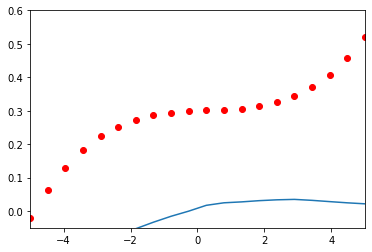

In [8]:
# Here we instantiate the above defined MLP.
mlp = MLP()

# We have to reshape the input. The input has shape (15,)
# because we have 15 samples. But if we feed it like that
# the network thinks we feed in one 15-dimensional input. We want 15
# 1-dimensional inputs, which would be shape (15,1). 
# In general the shape of an input should be (batch_size, input_dimension).
xs = tf.reshape(training_data_xs, shape=(-1,1))
    
# calling the network
output = mlp(xs)
 
    
# let us plot the output of our model against the training data                
plt.figure()
plt.scatter(training_data_xs,training_data_ys, c='red')

                 
plt.plot(training_data_xs, output)
plt.xlim(-5,5)
plt.ylim(-0.05,0.6)
plt.show()

So we can see that our MLP does yet a pretty bad job. Now wonder, we havent' trained it yet. But before we come to that, check out the next section to learn how to define an even bigger MLP in a more simple way.